In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')

  
  basepath  = '/content/drive/MyDrive'
  sys.path.append('/content/drive/MyDrive/custom-functions')


Mounted at /content/drive


In [3]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=e03f27003c9944038d687d5a1fdeff8991c643b419fb3b3249987bec0f5642f7
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [4]:
!pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 9.1 MB/s eta 0:00:00


In [5]:
# Importing the necessary libraries
import torch
import torch.nn as nn
import numpy as np
from pathlib import Path
import wandb
import sys

import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
# Importing the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F


import torchmetrics
from torchmetrics.classification import Accuracy

import random
import numpy as np
import joblib

from types import SimpleNamespace
from functools import partial
from pathlib import Path
import sys
from sklearn.metrics import accuracy_score, f1_score

from torch.utils.data import Dataset, DataLoader
from collections import Counter
from torchtext.vocab import vocab
import joblib
import ast

In [6]:
# Login to W&B
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [7]:
base_folder = Path(basepath)
data_folder = base_folder/'data'
model_folder = base_folder/'models'
custom_functions = base_folder/'custom-functions'


In [8]:
df=joblib.load("/content/drive/MyDrive/df_multilabel_hw_cleaned.joblib")

In [9]:
df.head(5)

,cleaned_text,Tags,Tag_Number
0,asp query stre dropdown webpage follow control...,c# asp.net,"[0, 9]"
1,run javascript code server java code want run ...,java javascript,"[1, 3]"
2,linq sql throw exception row find change hi li...,c# asp.net,"[0, 9]"
3,run python script php server run nginx web ser...,php python,"[2, 7]"
4,advice write function m try write function res...,javascript jquery,"[3, 5]"


In [10]:
df['Tag_Number'] = df['Tag_Number'].apply(ast.literal_eval)

In [11]:
type(df['Tag_Number'])

pandas.core.series.Series

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
MLB=MultiLabelBinarizer()

In [14]:
tag_number_encoded=MLB.fit_transform(df['Tag_Number'])

In [57]:
Tag_Number_encoded=pd.DataFrame(tag_number_encoded)

In [58]:
df=pd.concat([df,Tag_Number_encoded],axis=1)

In [59]:
df.head(5)

,cleaned_text,Tags,Tag_Number,0,1,2,3,4,5,6,...,0,1,2,3,4,5,6,7,8,9
0,asp query stre dropdown webpage follow control...,c# asp.net,"[0, 9]",1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,run javascript code server java code want run ...,java javascript,"[1, 3]",0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,linq sql throw exception row find change hi li...,c# asp.net,"[0, 9]",1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,run python script php server run nginx web ser...,php python,"[2, 7]",0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,advice write function m try write function res...,javascript jquery,"[3, 5]",0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [60]:

from data_preparation_imdb_rev0 import *
from ff_3_layer_sequential_model import MLPCustom
from Trainer_v2 import Trainer

In [61]:
X=df['cleaned_text']
y=Tag_Number_encoded.values

In [62]:
y

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,shuffle=True,test_size=0.4)

In [64]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,random_state=2,shuffle=True,test_size=0.5)

#Custom Dataset

In [65]:
trainset = CustomDataset(X_train, y_train)
validset = CustomDataset(X_val, y_val)
testset = CustomDataset(X_test,y_test)

# Create Vocab

In [66]:
my_vocab=get_vocab(trainset)

In [67]:
len(my_vocab)

220359

# Hyperparameters

In [68]:
hyperparameters = SimpleNamespace(
    # model Parameters
    EMBED_DIM=300,
    VOCAB_SIZE=len(my_vocab),
    OUTPUT_DIM=10,
    HIDDEN_DIM1=200,
    HIDDEN_DIM2=100,
    NON_LINEARITY=F.relu,
    
    # training 
    EPOCHS=5,
    BATCH_SIZE=128,
    LEARNING_RATE=0.001,
    WEIGHT_DECAY=0.000,
    CLIP_TYPE = 'value',
    CLIP_VALUE = 10,
    PATIENCE=5, 
)

# Create Data Loaders

In [69]:
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

collate_fn = partial(collate_batch, vocab=my_vocab)

# Data Loader
train_loader, valid_loader = get_loaders(trainset, validset, batch_size_= hyperparameters.BATCH_SIZE, 
                                         collate_fn=collate_fn)


# cross entropy loss function
loss_function = nn.MultiLabelSoftMarginLoss()

# model
model_tags = MLPCustom(hyperparameters.EMBED_DIM,
                       hyperparameters.VOCAB_SIZE,
                       hyperparameters.HIDDEN_DIM1,
                       hyperparameters.HIDDEN_DIM2,
                       hyperparameters.OUTPUT_DIM,
                       hyperparameters.NON_LINEARITY)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)


# apply initialization recursively  to all modules
model_tags.apply(init_weights)

# Intialize stochiastic gradient descent optimizer
optimizer = torch.optim.Adam(model_tags.parameters(),
                             lr=hyperparameters.LEARNING_RATE,
                             weight_decay=hyperparameters.WEIGHT_DECAY,
                             )

# Sanity Check

In [70]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
for input_ , targets  in train_loader:

    # move inputs and outputs to GPUs
    model_tags = model_tags.to(device)
    input_  = tuple(input_tensor.to(device)
                            for input_tensor in input_)
    targets = targets.to(device)
    
    model_tags.eval()
    # Forward pass
    output = model_tags(input_)
    loss = loss_function(output, targets)
    print(f'Actual loss: {loss}')
    break

print(f'Expected Theoretical loss: {np.log(10)}')

Actual loss: 0.7006182670593262
Expected Theoretical loss: 2.302585092994046


# <Font color = 'pickle'>**Training Model**

In [71]:
trainer = Trainer(model=model_tags, optimizer=optimizer,
                  criterion=loss_function, device=device)

In [72]:
from torchmetrics.classification import  MultilabelHammingDistance



- Multilabel hamming distance is a measure of dissimilarity between two sets of labels.It will let you know what fraction of labels is different between two sets.
- The multilabel Hamming distance is a powerful metric for multilabel classification problems as it measures the level of intersection between two sets of labels, taking into account the complex dependencies and correlations that may exist between them. This is particularly significant in multilabel classification problem because the presence or absence of one label can significantly influence the probability of another label being present.

In [73]:
run_folder = model_folder/'rev1'
run_folder.mkdir(exist_ok=True)

# set loaders
trainer.set_loaders(train_loader, valid_loader)

# set metric -- OPTIONAL
train_metric = MultilabelHammingDistance(num_labels=10)
valid_metric = MultilabelHammingDistance(num_labels=10)
trainer.set_metric(train_metric.to(device), valid_metric.to(device))

# set checkpoint -- OPTIONAL
trainer.set_checkpoint(save_path=run_folder,
                       save_best=True, save_every_n_epochs=5, save_last_epoch=False)

# set early stopping -- OPTIONAL
trainer.set_early_stopping(patience = hyperparameters.PATIENCE)

# set gradient clipping -- OPTIONAL
trainer.set_gradient_clipping(hyperparameters.CLIP_TYPE, hyperparameters.CLIP_VALUE, norm_type=2)


In [74]:
trainer.sanity_check(num_classes=10)

Actual loss: 0.7001940011978149
Expected Theoretical loss: 2.302585092994046


In [75]:
trainer.train(num_epochs=hyperparameters.EPOCHS,multilabel=True)

Epoch 1/5 - Train Loss: 0.5761, Train Metric: 0.2741, Train Time: 0:00:09.467285
Epoch 1/5 - Val Loss: 0.2377, Val Metric: 0.0735, Val Time: 0:00:00.872492

Epoch 2/5 - Train Loss: 0.2312, Train Metric: 0.0827, Train Time: 0:00:09.603344
Epoch 2/5 - Val Loss: 0.1638, Val Metric: 0.0596, Val Time: 0:00:01.259954

Epoch 3/5 - Train Loss: 0.1738, Train Metric: 0.0616, Train Time: 0:00:09.718725
Epoch 3/5 - Val Loss: 0.1452, Val Metric: 0.0534, Val Time: 0:00:01.309771

Epoch 4/5 - Train Loss: 0.1461, Train Metric: 0.0512, Train Time: 0:00:09.656837
Epoch 4/5 - Val Loss: 0.1352, Val Metric: 0.0502, Val Time: 0:00:01.188174

Epoch 5/5 - Train Loss: 0.1274, Train Metric: 0.0450, Train Time: 0:00:09.704955
Epoch 5/5 - Val Loss: 0.1288, Val Metric: 0.0480, Val Time: 0:00:01.207294



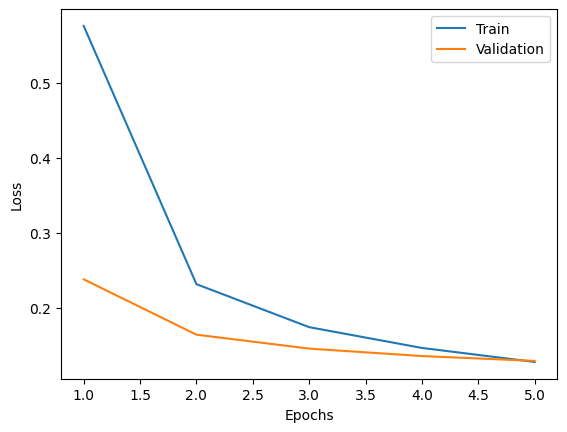

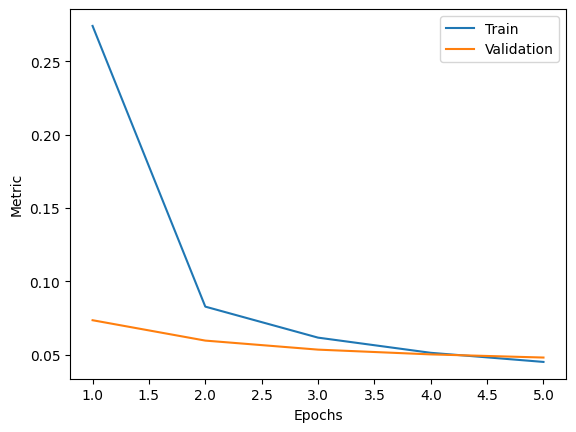

In [76]:
trainer.plot_history()

In [77]:
trainer.best_epoch

5

In [78]:
file = 'checkpoint_' + str(trainer.timestamp) + '_best.pt'
trainer.load_checkpoint(run_folder /file)

Loaded checkpoint from '/content/drive/MyDrive/models/rev1/checkpoint_2023-04-10_03-49-42_best.pt'.


In [79]:
trainer.train(num_epochs=10,multilabel=True)

Epoch 1/10 - Train Loss: 0.1111, Train Metric: 0.0396, Train Time: 0:00:10.331818
Epoch 1/10 - Val Loss: 0.1276, Val Metric: 0.0478, Val Time: 0:00:00.923373

Epoch 2/10 - Train Loss: 0.0990, Train Metric: 0.0353, Train Time: 0:00:09.723769
Epoch 2/10 - Val Loss: 0.1250, Val Metric: 0.0472, Val Time: 0:00:01.076482

Epoch 3/10 - Train Loss: 0.0873, Train Metric: 0.0312, Train Time: 0:00:09.659551
Epoch 3/10 - Val Loss: 0.1209, Val Metric: 0.0448, Val Time: 0:00:01.070935

EarlyStopping counter: 1 out of 5
Epoch 4/10 - Train Loss: 0.0782, Train Metric: 0.0277, Train Time: 0:00:09.663619
Epoch 4/10 - Val Loss: 0.1260, Val Metric: 0.0463, Val Time: 0:00:01.192084

EarlyStopping counter: 2 out of 5
Epoch 5/10 - Train Loss: 0.0692, Train Metric: 0.0249, Train Time: 0:00:09.941352
Epoch 5/10 - Val Loss: 0.1353, Val Metric: 0.0491, Val Time: 0:00:00.835890

EarlyStopping counter: 3 out of 5
Epoch 6/10 - Train Loss: 0.0628, Train Metric: 0.0226, Train Time: 0:00:09.681084
Epoch 6/10 - Val Loss

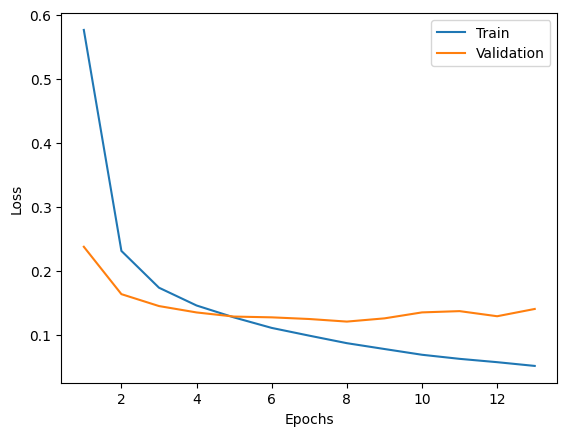

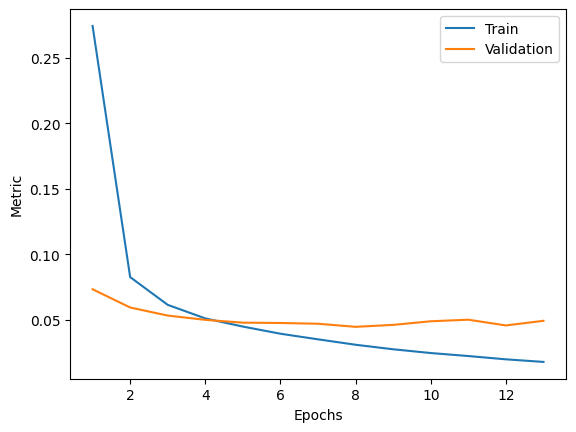

In [80]:
trainer.plot_history()

In [81]:
trainer.best_epoch

7

In [82]:
file = 'checkpoint_' + str(trainer.timestamp) + '_best.pt'
trainer.load_checkpoint(run_folder /file)

Loaded checkpoint from '/content/drive/MyDrive/models/rev1/checkpoint_2023-04-10_03-49-42_best.pt'.


In [83]:
test_loader = get_test_loaders(testset, batch_size_=hyperparameters.BATCH_SIZE,
                               collate_fn=collate_fn)

In [84]:
# Get the prediction for the test dataset

predictions_test, target_test = trainer.predict(
    test_loader, return_targets=True,multilabel=True)
predictions_train, target_train = trainer.predict(
    train_loader, return_targets=True,multilabel=True)
predictions_valid, target_valid = trainer.predict(
    valid_loader, return_targets=True,multilabel=True)


In [85]:
predictions_test.size()

torch.Size([9485, 10])

In [86]:
target_test.size()

torch.Size([9485, 10])

In [87]:
predictions_train.size()

torch.Size([28456, 10])

In [88]:
target_train.size()

torch.Size([28456, 10])

In [89]:
predictions_valid.size()

torch.Size([9486, 10])

In [90]:
target_valid.size()

torch.Size([9486, 10])

In [91]:
from  torchmetrics.functional.classification import multilabel_f1_score, multilabel_hamming_distance

In [92]:
metric=multilabel_f1_score
f1_train = metric(predictions_train, target_train,
                   num_labels=10,average='micro')
f1_valid = metric(predictions_valid, target_valid,
                    num_labels=10,average='micro')
f1_test = metric(predictions_test, target_test,
                   num_labels=10,average='micro')


In [93]:
# Print Test F1 score
print('Test F1 score', f1_test * 100)
print('Train F1 score', f1_train * 100)
print('Valid F1 score', f1_valid * 100)

Test F1 score tensor(89.0816)
Train F1 score tensor(95.1966)
Valid F1 score tensor(89.0361)


In [94]:
metric=multilabel_hamming_distance
hamming_distance_train = metric(predictions_train, target_train,
                   num_labels=10)
hamming_distance_valid = metric(predictions_valid, target_valid,
                    num_labels=10)
hamming_distance_test = metric(predictions_test, target_test,
                   num_labels=10)


In [95]:
# Print Test Hamming distance
print('Test Hamming Distance', hamming_distance_test)
print('Train Hamming Distance', hamming_distance_train)
print('Valid Hamming distance', hamming_distance_valid)

Test Hamming Distance tensor(0.0447)
Train Hamming Distance tensor(0.0198)
Valid Hamming distance tensor(0.0448)
